<a href="https://colab.research.google.com/github/Julian-Mirkin/Examen-1er-bimestre--Julian-Mirkin/blob/main/Mirkin_Gomez_Lutteral.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
from IPython.display import display
import pandas as pd
from typing import Tuple
from sklearn.datasets import load_wine
from sklearn import tree
import sklearn.model_selection
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

dataset sacado de kaggle que con target en saber si el accidentado sobrevive a un choque

In [51]:
df = pd.read_csv("https://raw.githubusercontent.com/Julian-Mirkin/tp1-chona/refs/heads/main/accident.csv")
print(df)

     Age  Gender  Speed_of_Impact Helmet_Used Seatbelt_Used  Survived
0     56  Female             27.0          No            No         1
1     69  Female             46.0          No           Yes         1
2     46    Male             46.0         Yes           Yes         0
3     32    Male            117.0          No           Yes         0
4     60  Female             40.0         Yes           Yes         0
..   ...     ...              ...         ...           ...       ...
195   69  Female            111.0          No           Yes         1
196   30  Female             51.0          No           Yes         1
197   58    Male            110.0          No           Yes         1
198   20    Male            103.0          No           Yes         1
199   56  Female             43.0          No           Yes         1

[200 rows x 6 columns]


Se pueden ver datos en tipo string y float, por lo que habrá que pasar todo a float. Por otro lado, se puede notar del dataset que hay muchas muestras y no tantos feauters

pasamos todo a float para que se pueda entrenar en el árbol

In [52]:
le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Helmet_Used"] = le.fit_transform(df["Helmet_Used"])
df["Seatbelt_Used"] = le.fit_transform(df["Seatbelt_Used"])

print(df)

     Age  Gender  Speed_of_Impact  Helmet_Used  Seatbelt_Used  Survived
0     56       0             27.0            0              0         1
1     69       0             46.0            0              1         1
2     46       1             46.0            1              1         0
3     32       1            117.0            0              1         0
4     60       0             40.0            1              1         0
..   ...     ...              ...          ...            ...       ...
195   69       0            111.0            0              1         1
196   30       0             51.0            0              1         1
197   58       1            110.0            0              1         1
198   20       1            103.0            0              1         1
199   56       0             43.0            0              1         1

[200 rows x 6 columns]


In [53]:
X = df.drop(columns= ['Survived'])
Y= df['Survived']

In [54]:
def cargar_datos() -> Tuple[pd.DataFrame, pd.Series]:

  X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(
                    X,
                    Y,
                    random_state=4,
                    test_size=0.1)
  return pd.DataFrame(X_train, columns = X.columns), pd.Series(y_train, name='Survived'), pd.DataFrame(X_test, columns = X.columns), pd.Series(y_test, name='Survived')

def predict(X: pd.DataFrame) -> list:
  """
  Predice la salida para cada fila de los datos. Debe definirse primero la función predict_instance para utilizarla
  """
  y_predicted = []
  for x in X.itertuples():
      try:
          y_i = predict_instance(x)
      except NameError:
          raise NameError("Por favor definir la función predict_instance")
      y_predicted.append(y_i)
  return y_predicted


def accuracy(y_predicted: list, y_real: list) -> float:
  """
  Calcula el accuracy entre un y_predicted y un y_real.
  """
  TP_TN = sum([y_i == y_j for (y_i, y_j) in zip(y_predicted, y_real)])
  P_N = len(y_real)
  return TP_TN / P_N

pongo a entrenar

In [55]:
X_train, y_train, X_test, y_test = cargar_datos()
X_train.head()
clf = DecisionTreeClassifier(random_state=4, max_depth=13)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=13, random_state=4)

In [56]:
from re import X
def predict_instance(x: pd.Series) -> int:
    """
    Predice la clase para instancia x.
    """
    row_df = pd.DataFrame([x[1:]], columns=X_train.columns)
    return clf.predict(row_df)[0]

In [57]:
y_pred = predict(X_train)
# Completar el algoritmo para mejorar esta performance.
print(f"Accuracy: {round(accuracy(y_pred, y_train), 3)}")

Accuracy: 1.0


In [58]:
y_pred = predict(X_test)
# Completar el algoritmo para mejorar esta performance.
print(f"Accuracy: {round(accuracy(y_pred, y_test), 3)}")

Accuracy: 0.45


In [59]:
from sklearn.metrics import accuracy_score

y_train_pred = clf.predict(X_train)
print(f"Train Accuracy: {round(accuracy_score(y_train, y_train_pred), 3)}")

y_test_pred = clf.predict(X_test)
print(f"Test Accuracy: {round(accuracy_score(y_test, y_test_pred), 3)}")

Train Accuracy: 1.0
Test Accuracy: 0.45


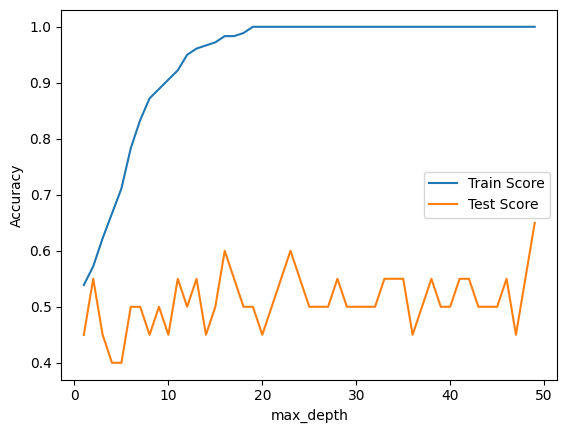

In [60]:
max_depths = range(1, 50)
train_scores = []
test_scores = []
for max_depth in max_depths:
    arbol = DecisionTreeClassifier(max_depth=max_depth, criterion="entropy")
    arbol.fit(X_train, y_train)
    train_scores.append(arbol.score(X_train, y_train))
    test_scores.append(arbol.score(X_test, y_test))
plt.plot(max_depths, train_scores, label='Train Score')
plt.plot(max_depths, test_scores, label='Test Score')
plt.xlabel('max_depth')
plt.ylabel('Accuracy')
plt.legend()
plt.show()